<a href="https://colab.research.google.com/github/Navneet-Mishra-27/EDA/blob/main/Indian_Judges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/tcpd/Judiciary-Data/refs/heads/main/TCPD_IJD_Judiciary_Dataset.csv")

In [ ]:
# Basic information about the dataset
print("Dataset Info:")
print(data.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(data.describe())

# Preview of the data
print("\nFirst few rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         8760 non-null   object 
 1   Court                        8653 non-null   object 
 2   Position                     8758 non-null   object 
 3   Biodata                      6935 non-null   object 
 4   DOB                          6121 non-null   object 
 5   City_Village_Birth           1257 non-null   object 
 6   District_Birth               1211 non-null   object 
 7   State_Birth                  1347 non-null   object 
 8   Start_Date_Appointment       8061 non-null   object 
 9   End_Date_Appointment         6882 non-null   object 
 10  Reason_Leaving_Appointment   5017 non-null   object 
 11  Sex_Source                   2932 non-null   object 
 12  Sex                          8760 non-null   object 
 13  ID  

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop rows or columns with too many missing values
data_cleaned = data.dropna(subset=['Name', 'Court'])  # Example: Drop rows missing critical data

# Check for duplicates
print("\nNumber of duplicate rows:", data_cleaned.duplicated().sum())

# Remove duplicates if necessary
data_cleaned = data_cleaned.drop_duplicates()



Missing values per column:
Name                              0
Court                           107
Position                          2
Biodata                        1825
DOB                            2639
City_Village_Birth             7503
District_Birth                 7549
State_Birth                    7413
Start_Date_Appointment          699
End_Date_Appointment           1878
Reason_Leaving_Appointment     3743
Sex_Source                     5828
Sex                               0
ID                                0
Source_of_Recruitment          3032
Enrollment_Year                3949
LLB_Institutition              3187
Other_Bachelors_Institution    6278
Other_Bachelors_Degree         6110
Other_Masters_Degree           8011
Other_Masters_Institution      8302
LLM_Institutition              8168
PhD_Instituition               8685
PhD_Subject                    8705
Processed_Name_For_Merges         2
Image                          3969
Duplicated_Jud                 7134



Gender distribution:
Sex
M    8277
F     340
Name: count, dtype: int64


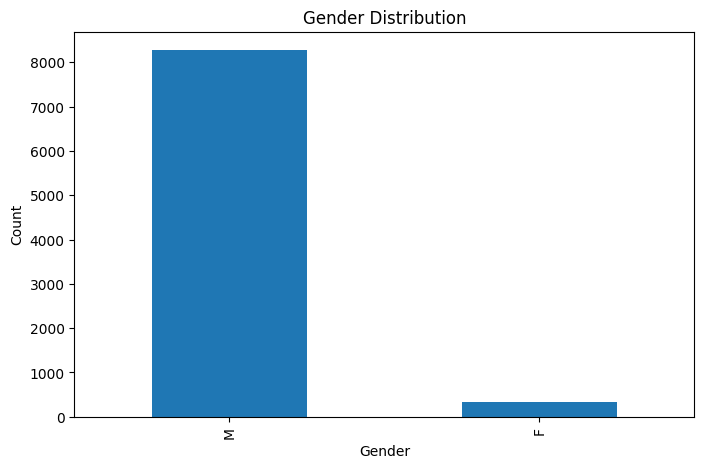

In [ ]:
# Gender analysis
if 'Sex' in data_cleaned.columns:
    gender_counts = data_cleaned['Sex'].value_counts()
    print("\nGender distribution:")
    print(gender_counts)

    # Visualize gender distribution
    import matplotlib.pyplot as plt
    gender_counts.plot(kind='bar', title='Gender Distribution', figsize=(8, 5))
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()


In [ ]:
from datetime import datetime

# Ensure columns are in datetime format
data_cleaned['DOB'] = pd.to_datetime(data_cleaned['DOB'], errors='coerce')
data_cleaned['End_Date_Appointment'] = pd.to_datetime(data_cleaned['End_Date_Appointment'], errors='coerce')

# Calculate age at the end of tenure or until today if still active
data_cleaned['Age_at_End'] = data_cleaned.apply(
    lambda row: ((row['End_Date_Appointment'] - row['DOB']).days // 365)
    if pd.notnull(row['End_Date_Appointment'])
    else ((datetime.now() - row['DOB']).days // 365),
    axis=1
)

# Check entries with extreme ages
print("\nEntries with extreme ages (e.g., over 100):")
print(data_cleaned[data_cleaned['Age_at_End'] > 65][['Name', 'DOB', 'End_Date_Appointment', 'Age_at_End']])



Entries with extreme ages (e.g., over 100):
                                              Name        DOB  \
146      CHIEF JUSTICE MR. BISHESHWAR PRASAD SINGH 1942-09-07   
147      CHIEF JUSTICE MR. BISHESHWAR PRASAD SINGH 1942-09-07   
148      CHIEF JUSTICE MR. BISHESHWAR PRASAD SINGH 1942-09-07   
149         CHIEF JUSTICE MR. CHITTATOSH MOOKERJEE 1929-01-01   
153   CHIEF JUSTICE MR. CHUNILAL KARSANDAS THAKKER 1943-10-11   
...                                            ...        ...   
8415                         SRI JUSTICE VAMAN RAO 1939-09-05   
8417                SRI JUSTICE VEGI SURI APPA RAO 1952-01-07   
8418                SRI JUSTICE VEGI SURI APPA RAO 1952-01-07   
8420                SRI JUSTICE VEGI SURI APPA RAO 1952-01-07   
8421               SRI JUSTICE VILAS V.AFZULPURKAR 1954-02-03   

     End_Date_Appointment  Age_at_End  
146                   NaT        82.0  
147                   NaT        82.0  
148                   NaT        82.0  
149           

In [ ]:
# Filter out invalid ages
data_cleaned = data_cleaned[data_cleaned['Age_at_End'] <= 65]

# Verify the cleaned data
print("\nCleaned Age Distribution:")
print(data_cleaned['Age_at_End'].describe())



Cleaned Age Distribution:
count    1688.000000
mean       58.446090
std         6.996192
min       -19.000000
25%        57.000000
50%        61.000000
75%        62.000000
max        65.000000
Name: Age_at_End, dtype: float64


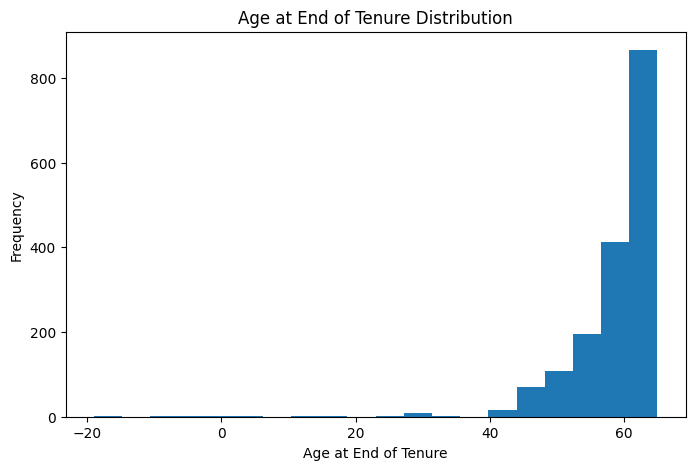


Age distribution:
Age_at_End
 62.0    317
 61.0    252
 64.0    136
 58.0    115
 60.0    114
 65.0    106
 59.0    105
 57.0     78
 55.0     59
 56.0     57
 63.0     55
 54.0     45
 53.0     35
 51.0     33
 52.0     29
 48.0     26
 49.0     23
 50.0     22
 47.0     19
 44.0     10
 29.0      9
 46.0      8
 45.0      7
 42.0      5
 40.0      5
 41.0      4
 43.0      3
-9.0       2
 14.0      1
-4.0       1
-1.0       1
 18.0      1
 4.0       1
 0.0       1
 27.0      1
-19.0      1
 32.0      1
Name: count, dtype: int64


In [ ]:
# Plot cleaned age distribution
data_cleaned['Age_at_End'].plot(kind='hist', bins=20, title='Age at End of Tenure Distribution', figsize=(8, 5))
plt.xlabel('Age at End of Tenure')
plt.ylabel('Frequency')
plt.show()
if 'Age_at_End' in data_cleaned.columns:
    gender_counts = data_cleaned['Age_at_End'].value_counts()
    print("\nAge distribution:")
    print(gender_counts)


Appointment Duration:
count      594.00000
mean      1495.47138
std       1826.33396
min     -22162.00000
25%        492.25000
50%       1127.00000
75%       2151.75000
max      18634.00000
Name: Appointment_Duration, dtype: float64


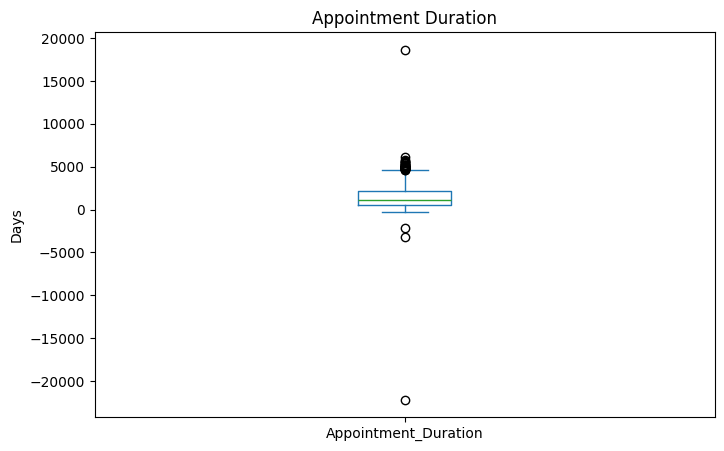

In [ ]:
# Calculate appointment duration if start and end dates are available
if 'Start_Date_Appointment' in data_cleaned.columns and 'End_Date_Appointment' in data_cleaned.columns:
    data_cleaned['Start_Date_Appointment'] = pd.to_datetime(data_cleaned['Start_Date_Appointment'], errors='coerce')
    data_cleaned['End_Date_Appointment'] = pd.to_datetime(data_cleaned['End_Date_Appointment'], errors='coerce')
    data_cleaned['Appointment_Duration'] = (data_cleaned['End_Date_Appointment'] - data_cleaned['Start_Date_Appointment']).dt.days

    print("\nAppointment Duration:")
    print(data_cleaned['Appointment_Duration'].describe())

    # Plot distribution of appointment duration
    data_cleaned['Appointment_Duration'].plot(kind='box', title='Appointment Duration', figsize=(8, 5))
    plt.ylabel('Days')
    plt.show()



Top 10 LLB Institutions:
LLB_Institutition
Law (not given)                               384
Faculty of Law, University of Delhi           132
University College of Law, Calcutta            68
Law(Not Given)                                 65
Allahabad University                           64
Law College, Madras                            57
Government Law College, Gauhati University     49
Osmania University, Hyderabad                  48
Government Law College, Bombay                 47
Lucknow University                             44
Name: count, dtype: int64


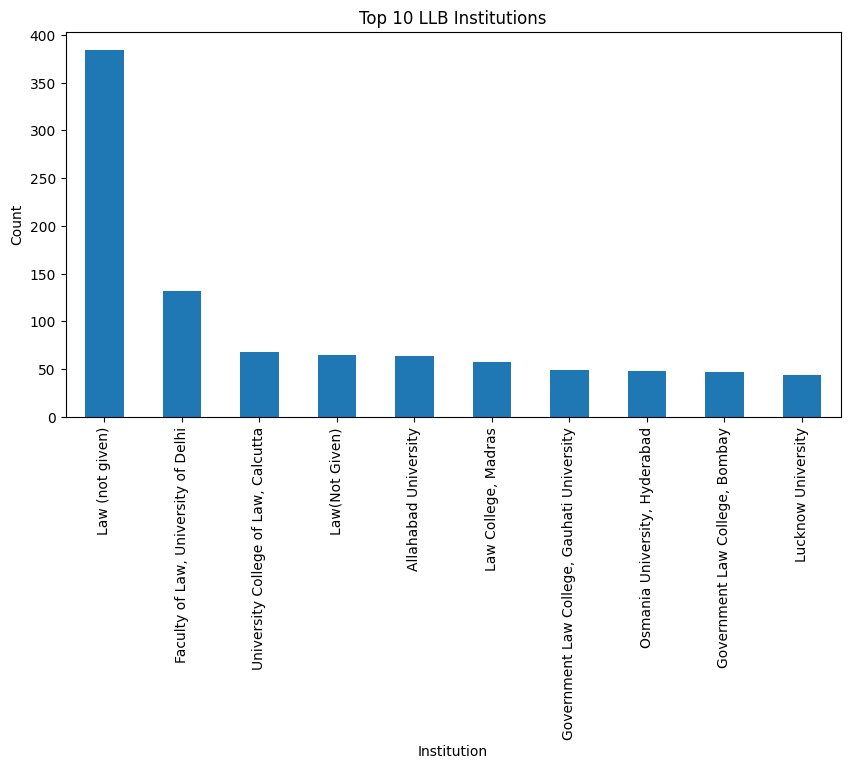

In [ ]:
# Analyze top institutions (e.g., LLB_Institutition)
if 'LLB_Institutition' in data_cleaned.columns:
    top_institutions = data_cleaned['LLB_Institutition'].value_counts().head(10)
    print("\nTop 10 LLB Institutions:")
    print(top_institutions)

    # Visualize top institutions
    top_institutions.plot(kind='bar', title='Top 10 LLB Institutions', figsize=(10, 5))
    plt.xlabel('Institution')
    plt.ylabel('Count')
    plt.show()



Birth State Distribution:
State_Birth
Andhra Pradesh       61
Assam                41
Gujarat              32
Karnataka            29
Maharashtra          23
Manipur              22
Jammu and Kashmir    18
Punjab               17
Tamil Nadu           15
Haryana              15
Name: count, dtype: int64


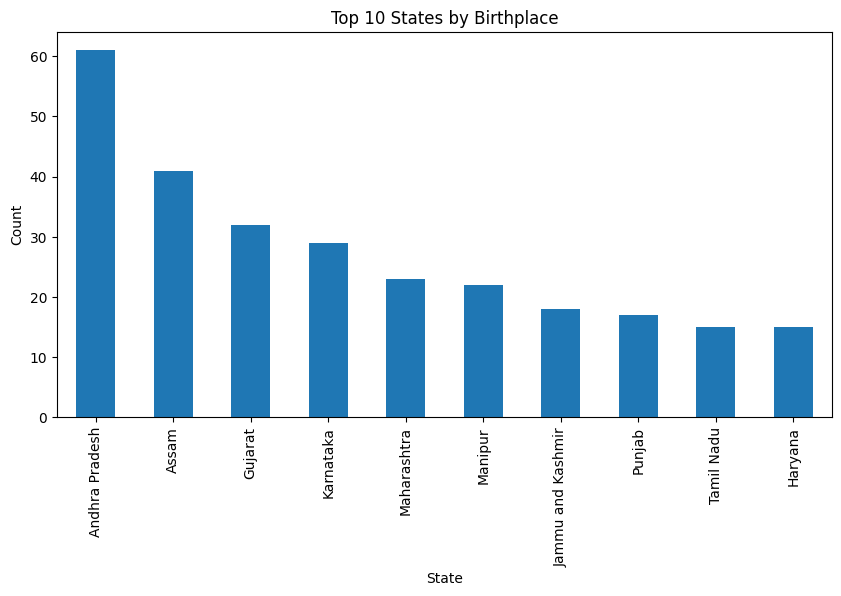

In [ ]:
# Analyze birth state distribution
if 'State_Birth' in data_cleaned.columns:
    state_counts = data_cleaned['State_Birth'].value_counts()
    print("\nBirth State Distribution:")
    print(state_counts.head(10))

    # Visualize state distribution
    state_counts.head(10).plot(kind='bar', title='Top 10 States by Birthplace', figsize=(10, 5))
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.show()



Source of Recruitment:
Source_of_Recruitment
BAR        995
SERVICE    519
Name: count, dtype: int64


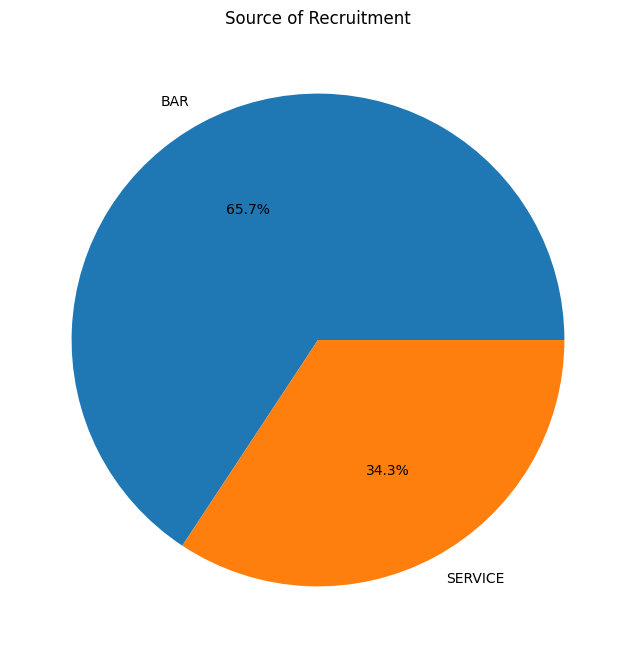

In [ ]:
if 'Source_of_Recruitment' in data_cleaned.columns:
    recruitment_counts = data_cleaned['Source_of_Recruitment'].value_counts()
    print("\nSource of Recruitment:")
    print(recruitment_counts)

    recruitment_counts.plot(kind='pie', autopct='%1.1f%%', title='Source of Recruitment', figsize=(8, 8))
    plt.ylabel('')
    plt.show()


In [ ]:
# Count unique educational pathways
if 'LLB_Institutition' in data_cleaned.columns and 'LLM_Institutition' in data_cleaned.columns:
    education_paths = data_cleaned.groupby(['LLB_Institutition', 'LLM_Institutition']).size()
    print("\nUnique Education Pathways:")
    print(education_paths.sort_values(ascending=False).head(10))



Unique Education Pathways:
LLB_Institutition                           LLM_Institutition                                 
Government Law College, Gauhati University  Gauhati University                                    18
Law (not given)                             Law (not given)                                       15
Osmania University, Hyderabad               Cambridge University                                   9
Faculty of Law, University of Delhi         Harvard University Massachusetts, USA                  8
Law(Not Given)                              Law (not given)                                        7
Faculty of Law, University of Delhi         University of Cambridge (England)                      6
Government Law College, Bombay              Government Law College, Bombay                         5
Law (not given)                             Mysore University                                      5
Osmania University, Hyderabad               University of London     